<a href="https://colab.research.google.com/github/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Credit_Card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <center> **Credit Card Fraud (Anomaly/Outlier) Detection** 
<center><em>The processes of determining an entry among entries that does not seem to belong. In this case we are using the Anonymized Credit Card dataset from Kaggle, which has  transactions labeled as fraudulent or genuine to create an ML Fraud Detection model.</em></center>
<br>
<center><img src="https://github.com/kkrusere/Credit-Card-Fraud-Anomaly-Outlier-Detection/blob/main/Assets/CCFD.png" width=600/></center>

***Project Contributors:*** Kuzi Rusere<br>
**MBA streamlit App URL:** N/A

Anomaly detection (also referred to as outlier detection and sometimes as novelty detection) is generally understood to be the identification of rare items, events, or observations that deviate significantly from the majority of the data and do not conform to a well-defined notion of normal behavior.  **Supervised anomaly detection** techniques require a data set that has been labeled as "normal" and "abnormal" and involves training a classifier. **Unsupervised anomaly detection** techniques assume the data is unlabelled and are by far the most commonly used due to their wider and relevant application. **Semi-supervised anomaly detection** techniques assume that some portion of the data is labeled. 

* An anomaly or outlier is a point or collection of points that are relatively distant from other points in a multi-dimensional space of features, an observation (or subset of observations) that appears to be inconsistent with the remainder of that set of data.

There are multiple methods/approaches to undertaking anomaly (or outlier) detection and these are sort-of classified into 3:
* Simple **Statistical** methods, such as the $Z$ test where you look at the how many standards deviation the data point is from the sample mean. The higher the number of $σ$ the more anomalous the data point is. Other simple statistical methods are using the Interquartile Range on box plot or the Histogram bins. In this project we are not going to be using these methods as they are not applicable to multivariate data and not 'normally' distributed. 

* (General/Classical) **Machine Learning**, are the methodologies that we are going to focus in this project. The methods depending on the data can either be supervised, semi-supervised or unsupervised. Logistic Regression, Knears Neighbors, Support Vector Classifier, DecisionTree Classifier, LOF (Local outlier factor), Isolations Forest, DBSCAN, etc., are some examples of Machine Learning algorithms/methods used in anomaly/outlier
>

* **Deep Learning**, these are methods that are implemented on artificial neural networks for anomaly detection. common example of this are 
>



In [2]:
# #we read the data from the AWS RDS
# from sqlalchemy import create_engine
# import mysql.connector as connection
# import config


# host= config.host
# user= config.user
# db_password = config.password
# port = config.port
# database = config.database


# engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

# try:
#     query = f"SELECT * FROM NHANES_Data"
#     dataframe = pd.read_sql(query,engine)

# except Exception as e:
#     print(str(e))

### **Data Collection**

The data was collected from Kaggle the link is [here](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [3]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* **Time**: The time (in seconds) elapsed between the transaction and the very first transaction
* **V1 to V28**: Obtained from principle component analysis (PCA) transformation on original features that are not available due to confidentiality
* **Amount**: The amount of the transaction
* **Class**: The class of the transaction either it is fraudulent or not (Class = 0: Normal Transaction, Class = 1: Fraudulent Transaction)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe(include="all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
import plotly.express as px

In [7]:
#lets take a look at the classes:
df['Class'].value_counts() # Class 0: Normal Transaction, Class 1: Fraudulent Transaction

0    284315
1       492
Name: Class, dtype: int64

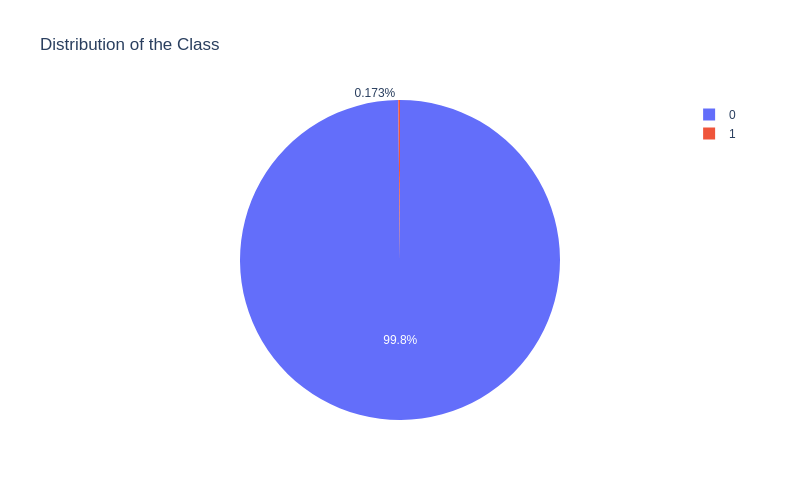

In [8]:
temp_df = pd.DataFrame(df['Class'].value_counts()).reset_index()
temp_df.columns = [temp_df.columns[1], 'Count']

fig = px.pie(temp_df, values='Count', names='Class', title='Distribution of the Class')
fig.show(renderer='png', height=500, width=800)
#fig.show(height=500, width=800)